# Tweet classification: Trump vs. Trudeau

# 1. Import the libraries

- Note : use a specific random state for your solution.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# 2. Read the dataset

In [22]:
df = pd.read_csv('tweets.csv')

In [23]:
df

,id,author,status
0,1,Donald J. Trump,I will be making a major statement from the @W...
1,2,Donald J. Trump,Just arrived at #ASEAN50 in the Philippines fo...
2,3,Donald J. Trump,"After my tour of Asia, all Countries dealing w..."
3,4,Donald J. Trump,Great to see @RandPaul looking well and back o...
4,5,Donald J. Trump,Excited to be heading home to see the House pa...
...,...,...,...
395,396,Justin Trudeau,RT @googlecanada: Watch tmw: @JustinTrudeau di...
396,397,Justin Trudeau,"Today in Ottawa, I met with the Modern Treaty ..."
397,398,Justin Trudeau,Voici le sommaire de ma rencontre avec les Pre...
398,399,Justin Trudeau,RT @VeteransENG_CA: #Day1 of 11 Days of Rememb...


In [24]:
df.author.unique()

array(['Donald J. Trump', 'Justin Trudeau'], dtype=object)

# 3. Split the dataset into X and y

In [28]:
X = df.drop(['author'], axis=1)
y = df['author']

# 4. Split the dataset into training set and testing set

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 5. Vectorize the tweets

- Note : Read about CountVectorizer and TfidfVectorizer methods and use them in training and testing dataset.

In [31]:
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

In [33]:
train_tweets = X_train['status'].tolist()
test_tweets = X_test['status'].tolist()

In [34]:
X_train_count = count_vectorizer.fit_transform(train_tweets)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_tweets)

In [35]:
X_test_count = count_vectorizer.transform(test_tweets)
X_test_tfidf = tfidf_vectorizer.transform(test_tweets)

# 6. Train a Logistic Regression model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [36]:
logreg_tfidf = LogisticRegression()
logreg_count = LogisticRegression()

In [37]:
logreg_tfidf.fit(X_train_tfidf, y_train)
logreg_count.fit(X_train_count, y_train)

LogisticRegression()

In [38]:
y_pred_tfidf = logreg_tfidf.predict(X_test_tfidf)
y_pred_count = logreg_count.predict(X_test_count)

# 7. Train a SVM model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [40]:
svm_tfidf = svm.SVC()
svm_count = svm.SVC()

In [42]:
svm_tfidf.fit(X_train_tfidf, y_train)
svm_count.fit(X_train_count, y_train)

SVC()

In [43]:
y_pred_tfidf = svm_tfidf.predict(X_test_tfidf)
y_pred_count = svm_count.predict(X_test_count)

# 8. Make a prediction and calculate the score for both Logistic Regression and SVM

In [46]:
y_pred_tfidf_logreg = logreg_tfidf.predict(X_test_tfidf)
y_pred_count_logreg = logreg_count.predict(X_test_count)

accuracy_tfidf_logreg = accuracy_score(y_test, y_pred_tfidf_logreg)
accuracy_count_logreg = accuracy_score(y_test, y_pred_count_logreg)

In [47]:
print("Logistic Regression - Accuracy with TF-IDF:", accuracy_tfidf_logreg)
print("Logistic Regression - Accuracy with Count Vectorized data:", accuracy_count_logreg)

Logistic Regression - Accuracy with TF-IDF: 0.87
Logistic Regression - Accuracy with Count Vectorized data: 0.88


In [48]:
y_pred_tfidf_svm = svm_tfidf.predict(X_test_tfidf)
y_pred_count_svm = svm_count.predict(X_test_count)

accuracy_tfidf_svm = accuracy_score(y_test, y_pred_tfidf_svm)
accuracy_count_svm = accuracy_score(y_test, y_pred_count_svm)

In [49]:
print("SVM - Accuracy with TF-IDF:", accuracy_tfidf_svm)
print("SVM - Accuracy with Count Vectorized data:", accuracy_count_svm)

SVM - Accuracy with TF-IDF: 0.88
SVM - Accuracy with Count Vectorized data: 0.86


# 9. Plot a confusion matrix for both Logistic Regression and SVM

In [50]:
cm_tfidf_logreg = confusion_matrix(y_test, y_pred_tfidf_logreg)
cm_count_logreg = confusion_matrix(y_test, y_pred_count_logreg)
cm_tfidf_svm = confusion_matrix(y_test, y_pred_tfidf_svm)
cm_count_svm = confusion_matrix(y_test, y_pred_count_svm)

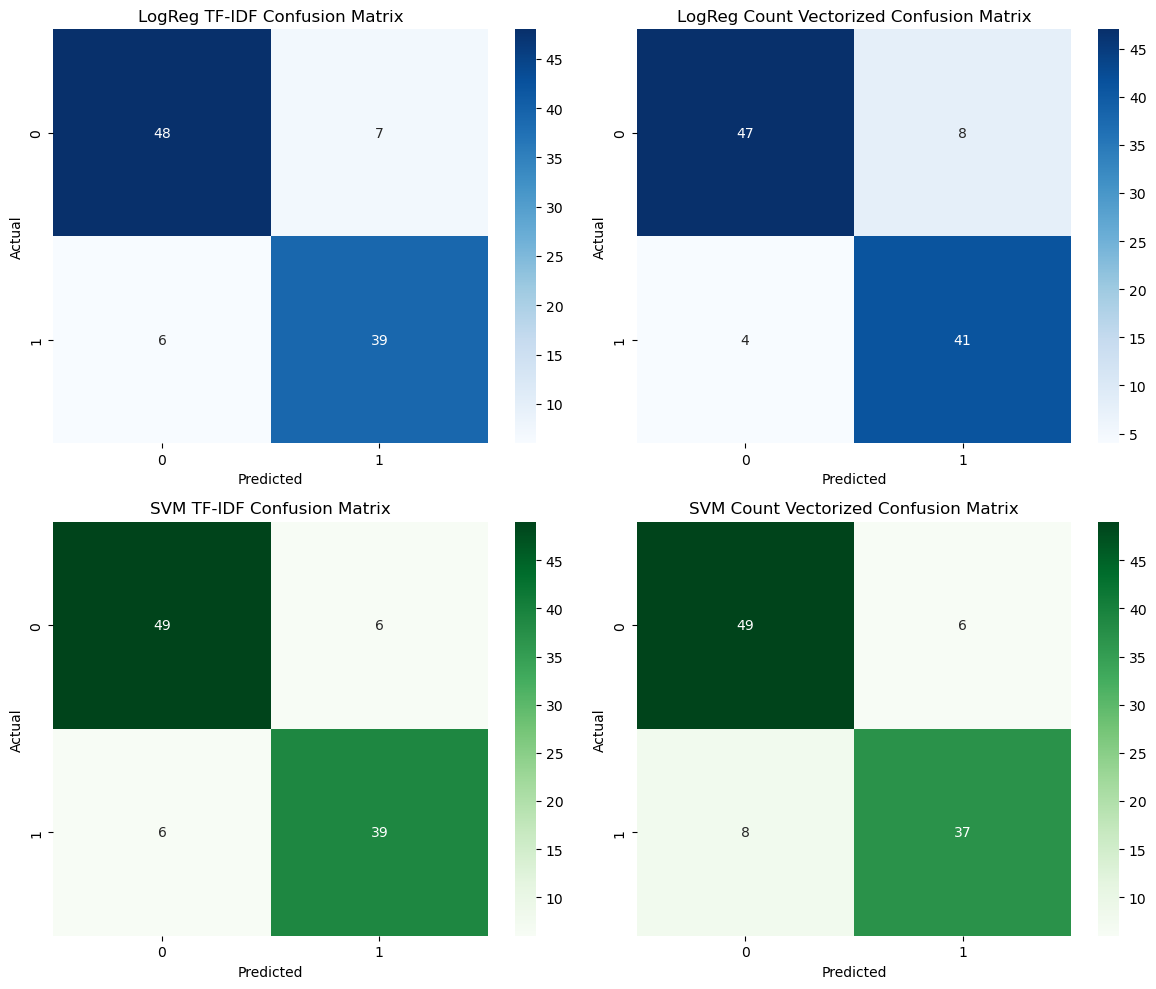

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.heatmap(cm_tfidf_logreg, annot=True, fmt="d", cmap="Blues", ax=axes[0, 0])
axes[0, 0].set_title("LogReg TF-IDF Confusion Matrix")
axes[0, 0].set_xlabel("Predicted")
axes[0, 0].set_ylabel("Actual")

sns.heatmap(cm_count_logreg, annot=True, fmt="d", cmap="Blues", ax=axes[0, 1])
axes[0, 1].set_title("LogReg Count Vectorized Confusion Matrix")
axes[0, 1].set_xlabel("Predicted")
axes[0, 1].set_ylabel("Actual")

sns.heatmap(cm_tfidf_svm, annot=True, fmt="d", cmap="Greens", ax=axes[1, 0])
axes[1, 0].set_title("SVM TF-IDF Confusion Matrix")
axes[1, 0].set_xlabel("Predicted")
axes[1, 0].set_ylabel("Actual")

sns.heatmap(cm_count_svm, annot=True, fmt="d", cmap="Greens", ax=axes[1, 1])
axes[1, 1].set_title("SVM Count Vectorized Confusion Matrix")
axes[1, 1].set_xlabel("Predicted")
axes[1, 1].set_ylabel("Actual")

plt.tight_layout()
plt.show()